In [1]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

2025-06-19 23:10:56.333699: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750374656.538828      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750374656.607603      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
ddos = pd.read_csv('/kaggle/input/cybersecurity/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
portscan = pd.read_csv('/kaggle/input/cybersecurity/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', encoding='latin1')
fri_morning = pd.read_csv('/kaggle/input/cybersecurity/Friday-WorkingHours-Morning.pcap_ISCX.csv')
infilteration = pd.read_csv('/kaggle/input/cybersecurity/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
webattacks = pd.read_csv('/kaggle/input/cybersecurity/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', encoding='latin1')
tues = pd.read_csv('/kaggle/input/cybersecurity/Tuesday-WorkingHours.pcap_ISCX.csv')
wed = pd.read_csv('/kaggle/input/cybersecurity/Wednesday-workingHours.pcap_ISCX.csv')

In [4]:
ddos.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
portscan.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
fri_morning.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [7]:
infilteration.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN


In [8]:
webattacks.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [9]:
tues.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [10]:
wed.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [11]:
ddos.shape, portscan.shape, fri_morning.shape, infilteration.shape, webattacks.shape, tues.shape, wed.shape

((225745, 79),
 (286467, 79),
 (191033, 79),
 (288602, 79),
 (170366, 79),
 (445909, 79),
 (692703, 79))

In [12]:
ddos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [13]:
portscan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286467 entries, 0 to 286466
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             286467 non-null  int64  
 1    Flow Duration                286467 non-null  int64  
 2    Total Fwd Packets            286467 non-null  int64  
 3    Total Backward Packets       286467 non-null  int64  
 4   Total Length of Fwd Packets   286467 non-null  int64  
 5    Total Length of Bwd Packets  286467 non-null  int64  
 6    Fwd Packet Length Max        286467 non-null  int64  
 7    Fwd Packet Length Min        286467 non-null  int64  
 8    Fwd Packet Length Mean       286467 non-null  float64
 9    Fwd Packet Length Std        286467 non-null  float64
 10  Bwd Packet Length Max         286467 non-null  int64  
 11   Bwd Packet Length Min        286467 non-null  int64  
 12   Bwd Packet Length Mean       286467 non-nul

In [14]:
df = pd.concat([ddos, portscan, fri_morning, infilteration, webattacks, tues, wed], ignore_index=True)
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [15]:
df.shape

(2300825, 79)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300825 entries, 0 to 2300824
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [17]:
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
rows_after_dropping = df.shape[0]
dropped_rows_count = initial_rows - rows_after_dropping
print(f"Number of duplicate rows dropped: {dropped_rows_count}")

Number of duplicate rows dropped: 281095


In [18]:
df.shape

(2019730, 79)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2019730 entries, 0 to 2300824
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max              

In [20]:
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['destination port', 'flow duration', 'total fwd packets',
       'total backward packets', 'total length of fwd packets',
       'total length of bwd packets', 'fwd packet length max',
       'fwd packet length min', 'fwd packet length mean',
       'fwd packet length std', 'bwd packet length max',
       'bwd packet length min', 'bwd packet length mean',
       'bwd packet length std', 'flow bytes/s', 'flow packets/s',
       'flow iat mean', 'flow iat std', 'flow iat max', 'flow iat min',
       'fwd iat total', 'fwd iat mean', 'fwd iat std', 'fwd iat max',
       'fwd iat min', 'bwd iat total', 'bwd iat mean', 'bwd iat std',
       'bwd iat max', 'bwd iat min', 'fwd psh flags', 'bwd psh flags',
       'fwd urg flags', 'bwd urg flags', 'fwd header length',
       'bwd header length', 'fwd packets/s', 'bwd packets/s',
       'min packet length', 'max packet length', 'packet length mean',
       'packet length std', 'packet length variance', 'fin flag count',
       'syn flag co

In [21]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['destination_port', 'flow_duration', 'total_fwd_packets',
       'total_backward_packets', 'total_length_of_fwd_packets',
       'total_length_of_bwd_packets', 'fwd_packet_length_max',
       'fwd_packet_length_min', 'fwd_packet_length_mean',
       'fwd_packet_length_std', 'bwd_packet_length_max',
       'bwd_packet_length_min', 'bwd_packet_length_mean',
       'bwd_packet_length_std', 'flow_bytes/s', 'flow_packets/s',
       'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min',
       'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max',
       'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std',
       'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags',
       'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length',
       'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s',
       'min_packet_length', 'max_packet_length', 'packet_length_mean',
       'packet_length_std', 'packet_length_variance', 'fin_flag_count',
       'syn_flag_co

In [22]:
missing_values = df.isnull().sum()
print(f"Missing Values per Column:\n{missing_values[missing_values > 0]}")

Missing Values per Column:
flow_bytes/s    302
dtype: int64


In [23]:
df['flow_bytes/s'] = df['flow_bytes/s'].fillna(df['flow_bytes/s'].mean())
# Verify that missing values are filled
missing_values_after = df.isnull().sum()
print(f"Missing Values after filling:\n{missing_values_after[missing_values_after > 0]}")

Missing Values after filling:
Series([], dtype: int64)


In [24]:
df.describe()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
count,2.019730e+06,2.019730e+06,2.019730e+06,2.019730e+06,2.019730e+06,2.019730e+06,2.019730e+06,2.019730e+06,2.019730e+06,2.019730e+06,...,2.019730e+06,2.019730e+06,2.019730e+06,2.019730e+06,2.019730e+06,2.019730e+06,2.019730e+06,2.019730e+06,2.019730e+06,2.019730e+06
mean,8.084802e+03,1.798848e+07,1.013716e+01,1.143593e+01,6.250248e+02,1.795096e+04,2.388601e+02,1.898301e+01,6.628964e+01,8.144411e+01,...,5.571002e+00,-2.898185e+03,9.634258e+04,4.631185e+04,1.765460e+05,7.021142e+04,1.074523e+07,6.530456e+05,1.123630e+07,1.024003e+07
std,1.821340e+04,3.639328e+07,7.607369e+02,1.016376e+03,1.139074e+04,2.302170e+06,8.132140e+02,6.541947e+01,2.132888e+02,3.230104e+02,...,6.142675e+02,1.252905e+06,7.056479e+05,4.186193e+05,1.092450e+06,6.329830e+05,2.677109e+07,5.327112e+06,2.758998e+07,2.650777e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,2.120000e+02,2.000000e+00,1.000000e+00,1.200000e+01,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,5.802550e+04,2.000000e+00,2.000000e+00,6.600000e+01,1.560000e+02,4.000000e+01,2.000000e+00,3.600000e+01,0.000000e+00,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,5.751222e+06,6.000000e+00,5.000000e+00,3.320000e+02,2.191000e+03,2.090000e+02,3.600000e+01,5.200000e+01,7.605092e+01,...,3.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553300e+04,1.200000e+08,2.079640e+05,2.846020e+05,1.290000e+07,6.270000e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.049469e+03,...,1.986360e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [25]:
# Identify infinite values in each column
infinite_values = df.isin([np.inf, -np.inf]).sum()
print(f"Infinite Values per Column:\n{infinite_values[infinite_values > 0]}")

Infinite Values per Column:
flow_bytes/s      1257
flow_packets/s    1257
dtype: int64


In [26]:
df = df.replace([np.inf, -np.inf], np.nan)  # Replace infinite values

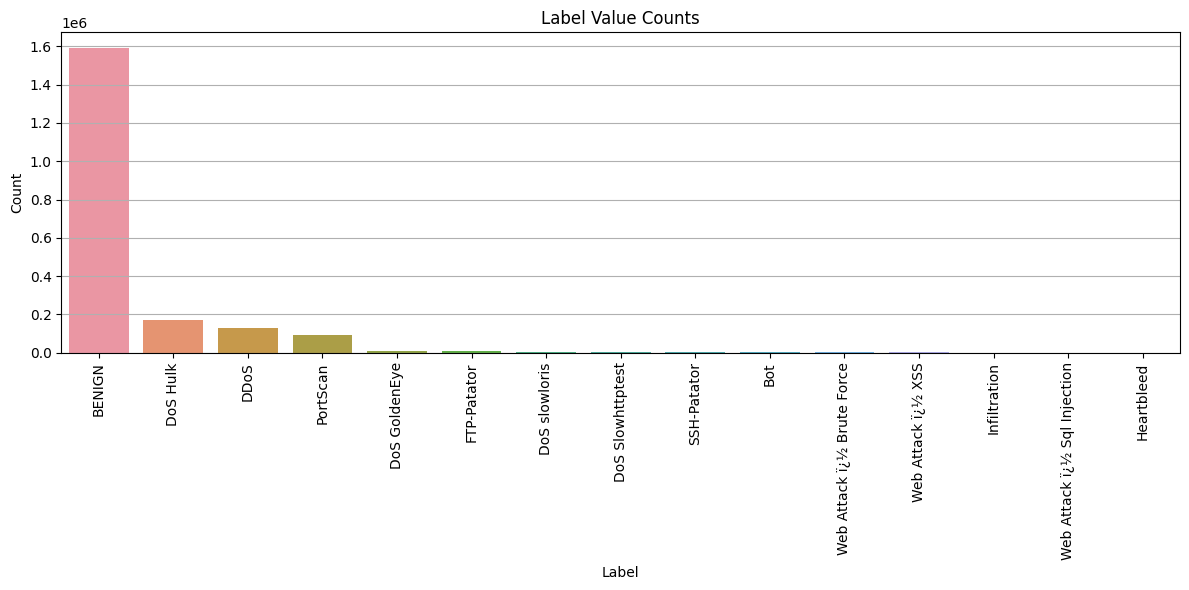

In [29]:
label_value_counts = df['label'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=label_value_counts.index, y=label_value_counts.values)
plt.title('Label Value Counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [30]:
df['label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack ï¿½ Brute Force', 'Web Attack ï¿½ XSS',
       'Web Attack ï¿½ Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [31]:
df['label'] = df['label'].str.replace('ï¿½', '', regex=False)
print(df['label'].unique())

['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration' 'Web Attack  Brute Force'
 'Web Attack  XSS' 'Web Attack  Sql Injection' 'FTP-Patator' 'SSH-Patator'
 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye'
 'Heartbleed']


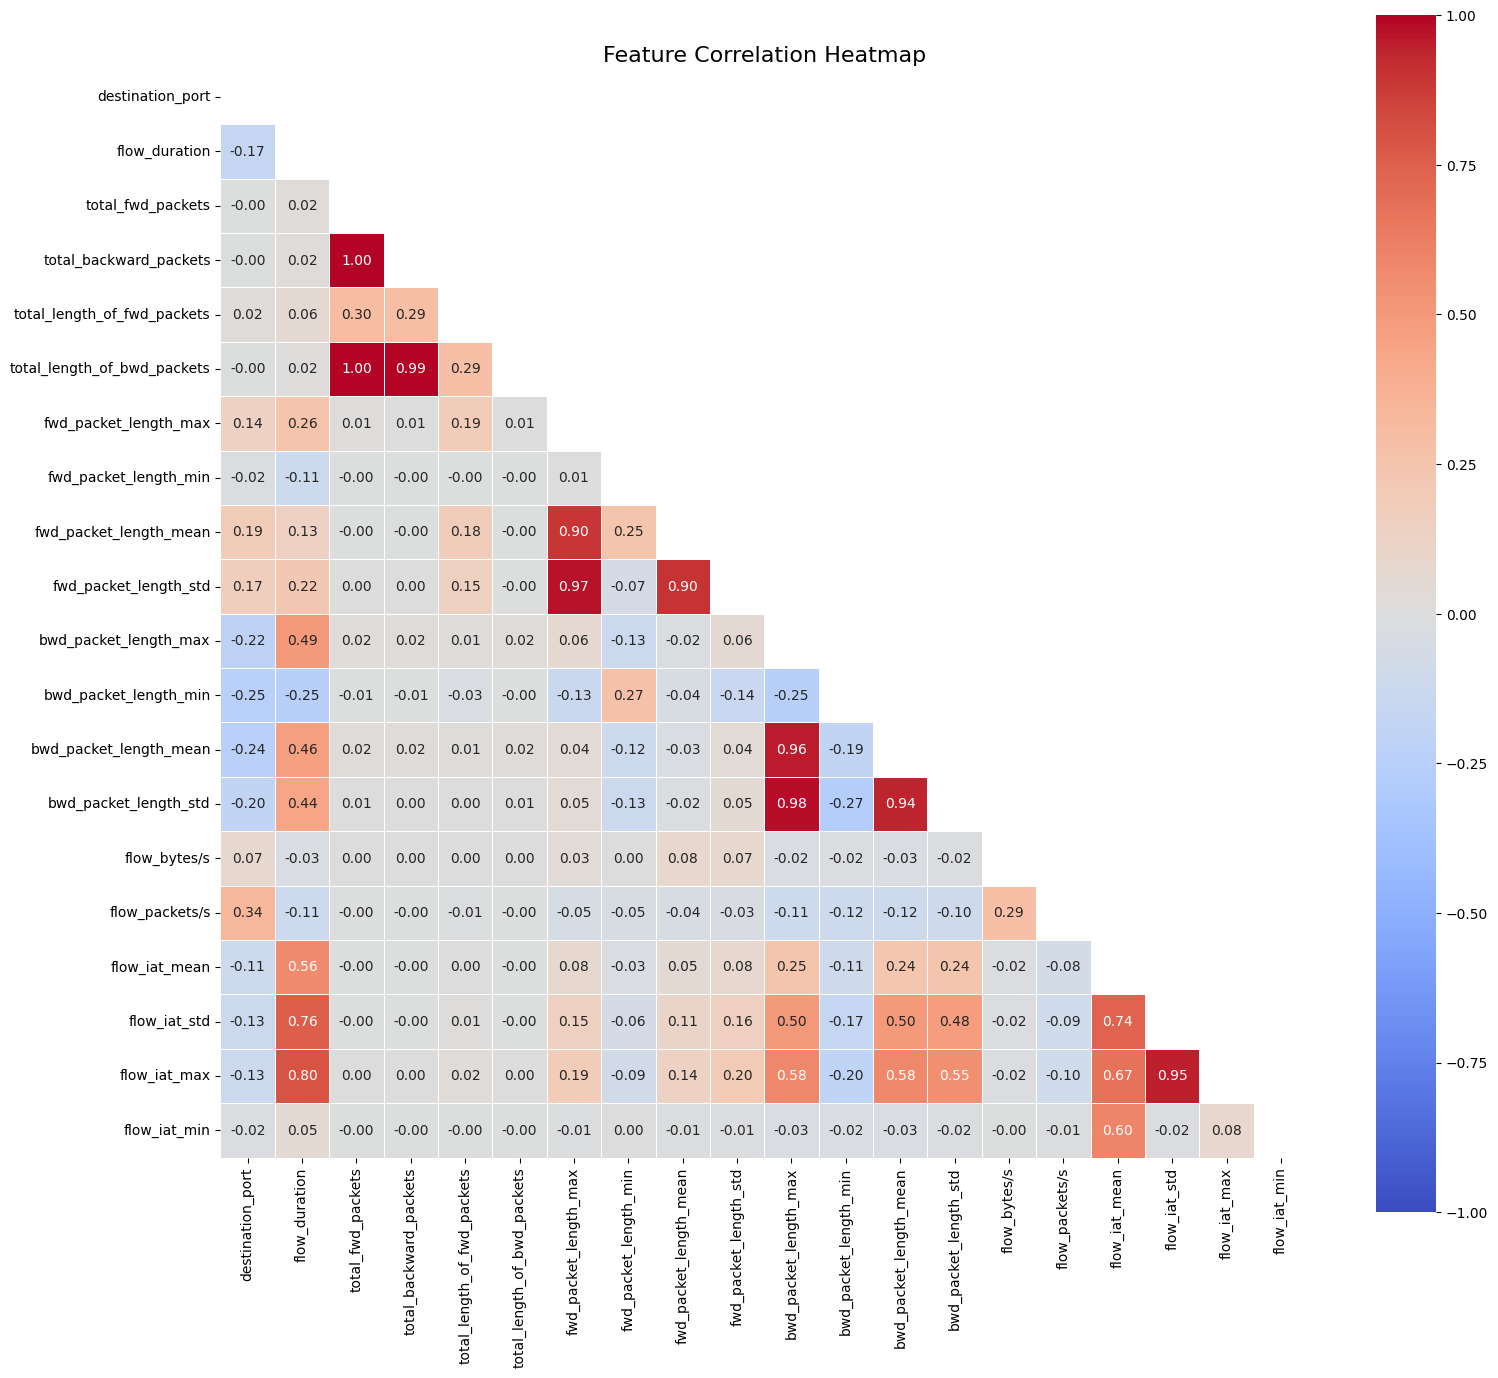

In [32]:
plt.figure(figsize=(16, 14))
# Select only numeric columns and exclude the target
numeric_df = df.select_dtypes(include=[np.number])
if 'label' in numeric_df.columns:
    correlation_cols = numeric_df.drop(columns=['label']).columns
    # Select top 20 features by correlation with target (if too many features)
    if len(correlation_cols) > 20:
        correlations = numeric_df[correlation_cols].corrwith(numeric_df['label'])
        top_features = correlations.abs().nlargest(20).index
        correlation_matrix = numeric_df[list(top_features) + ['label']].corr()
    else:
        correlation_matrix = numeric_df.corr()
else:
    # If no label column, just show all correlations
    correlation_cols = numeric_df.columns
    if len(correlation_cols) > 20:
        correlation_matrix = numeric_df.iloc[:, :20].corr()
    else:
        correlation_matrix = numeric_df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmin=-1, vmax=1,
            annot=True, fmt='.2f', linewidths=0.5, square=True)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

In [33]:
# Feature Selection - Drop irrelevant columns
irrelevant_columns = ['timestamp', 'flow_id'] if 'timestamp' in df.columns and 'flow_id' in df.columns else []
df.drop(columns=irrelevant_columns, inplace=True, errors='ignore')
print(f"Dropped irrelevant columns: {irrelevant_columns}")

Dropped irrelevant columns: []


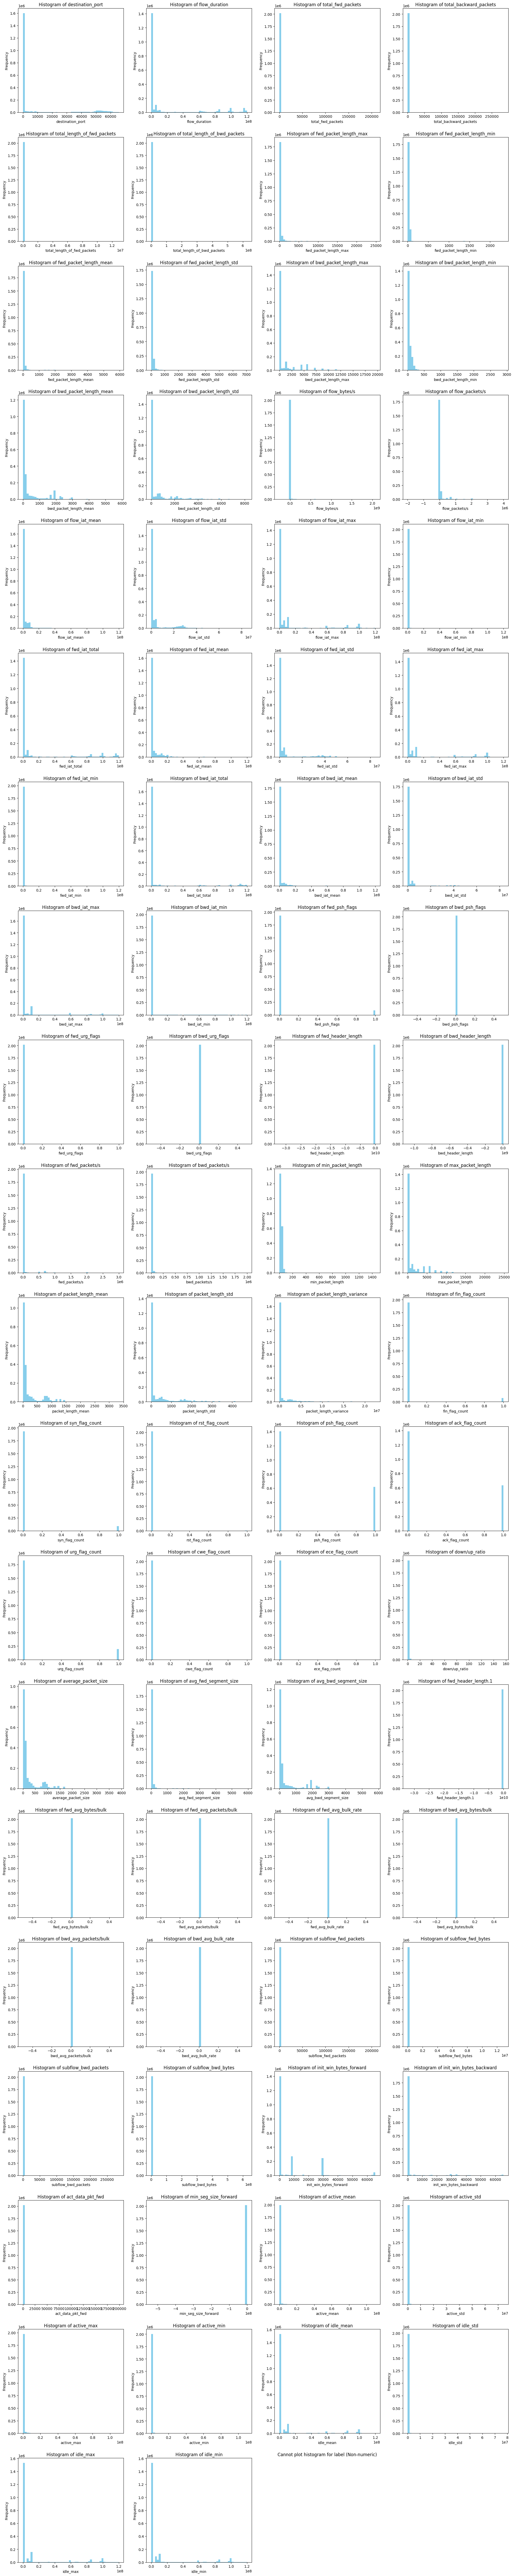

In [34]:
# Determine the number of columns for plotting
num_cols = len(df.columns)
num_rows = (num_cols + 3) // 4  # Calculate number of rows needed, 4 plots per row

# Create subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plot histogram for each column
for i, col in enumerate(df.columns):
    if df[col].dtype in ['int64', 'float64']: # Check if column is numeric
        axes[i].hist(df[col].dropna(), bins=50, color='skyblue') # Use dropna() to handle NaNs
        axes[i].set_title(f'Histogram of {col}', fontsize=12)
        axes[i].set_xlabel(col, fontsize=10)
        axes[i].set_ylabel('Frequency', fontsize=10)
    else:
        # Handle non-numeric columns if necessary, or just leave the subplot blank
        axes[i].set_title(f'Cannot plot histogram for {col} (Non-numeric)', fontsize=12)
        axes[i].axis('off') # Hide the axis for non-numeric columns

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [35]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['label']))
print("Features scaled.")

Features scaled.


In [36]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,
                                                    df['label'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['label'])
print("Train-test split completed.")
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Train-test split completed.


((1615784, 78), (403946, 78), (1615784,), (403946,))

In [38]:
print("Checking for non-numeric values in X_train:")
print(np.isnan(X_train).sum())
print("Checking for non-numeric values in y_train:")
print(y_train.isnull().sum())

Checking for non-numeric values in X_train:
2026
Checking for non-numeric values in y_train:
0


In [39]:
if np.isnan(X_train).sum() > 0:
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='mean') # or 'median'
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test) # Important to use transform on test data

In [40]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Model 1: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, 
                                  random_state=42,
                                  n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Performance:")
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
print(f"Accuracy: {rf_accuracy:.3f}")
print(f"F1 Score: {rf_f1:.3f}")
print(f"Precision: {rf_precision:.3f}")
print(f"Recall: {rf_recall:.3f}")

print("\nClassification Report for Random Forest Performance:")
print(classification_report(y_test, y_pred_rf, zero_division=1))

Random Forest Performance:
Accuracy: 0.998
F1 Score: 0.998
Precision: 0.998
Recall: 0.998

Classification Report for Random Forest Performance:
                           precision    recall  f1-score   support

                   BENIGN       1.00      1.00      1.00    318770
                      Bot       0.89      0.75      0.81       391
                     DDoS       1.00      1.00      1.00     25603
            DoS GoldenEye       1.00      1.00      1.00      2057
                 DoS Hulk       1.00      1.00      1.00     34570
         DoS Slowhttptest       0.99      1.00      0.99      1046
            DoS slowloris       1.00      0.99      0.99      1077
              FTP-Patator       1.00      1.00      1.00      1187
               Heartbleed       1.00      1.00      1.00         2
             Infiltration       1.00      0.71      0.83         7
                 PortScan       0.99      1.00      0.99     18164
              SSH-Patator       1.00      0.99     

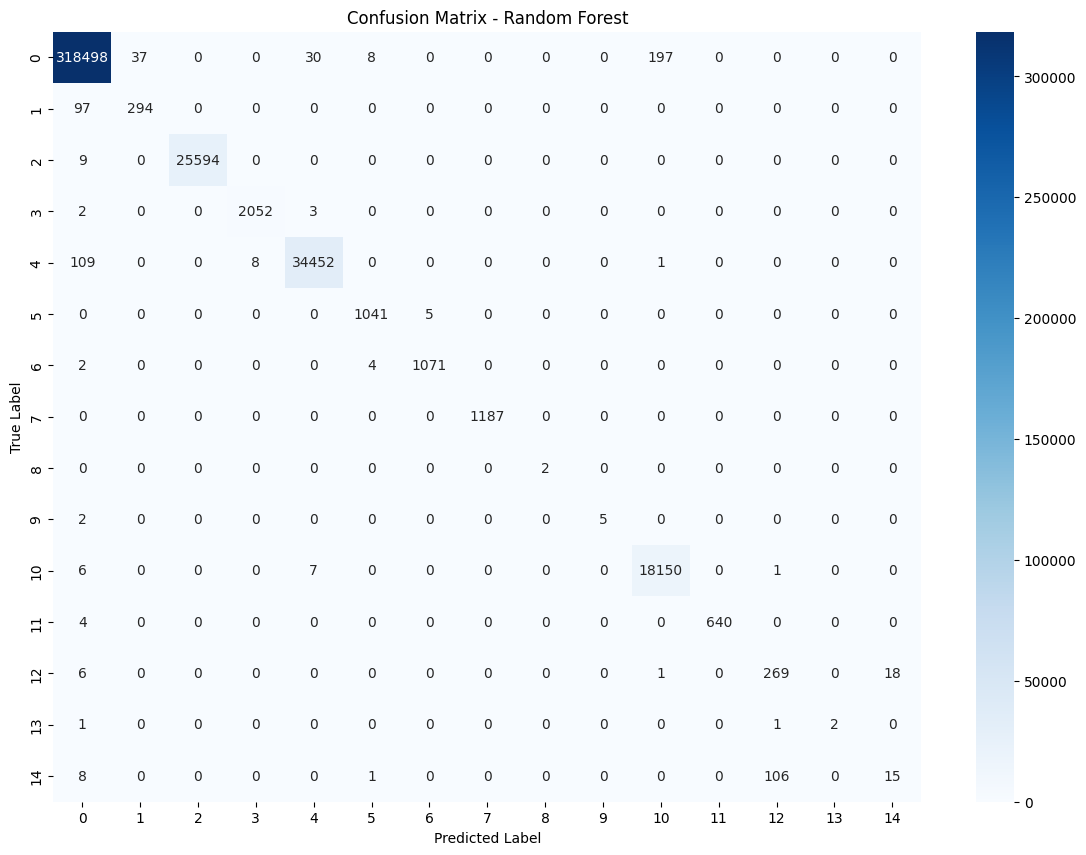

In [44]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(14, 10))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

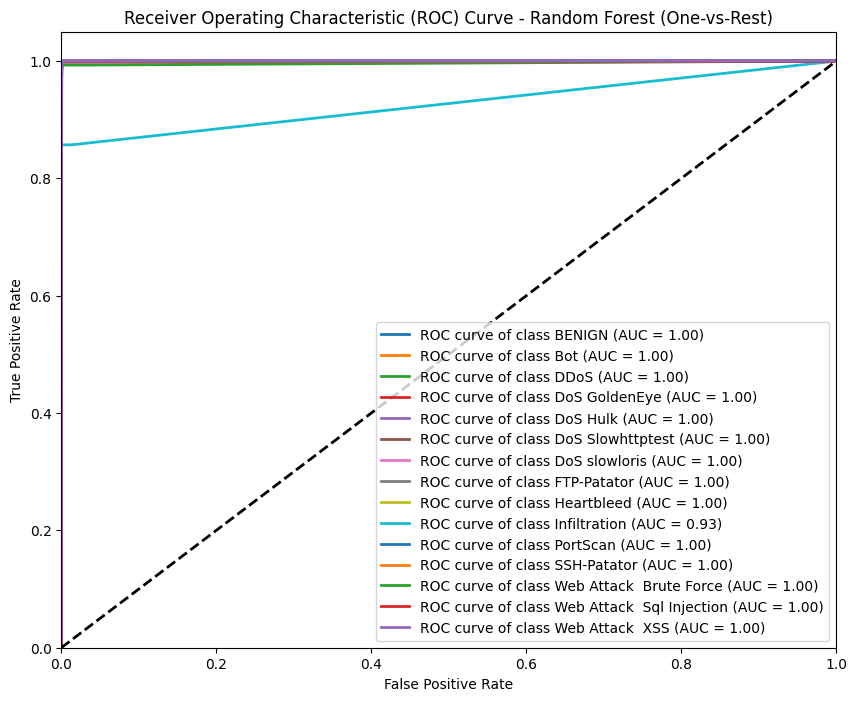


Macro-averaged AUC (One-vs-Rest): 0.995
Micro-averaged AUC (One-vs-Rest): 1.000


In [45]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc


# First, binarize the labels for each class
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
classes = lb.classes_

# Get the predicted probabilities for each class
# Use predict_proba for probabilities, which is required for AUC calculation
y_pred_proba_rf = rf_model.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

for i in range(len(classes)):
    # Get ROC curve for class i
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_rf[:, i])
    # Calculate AUC for class i
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2,
             label=f'ROC curve of class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()

# Macro-averaged AUC
macro_roc_auc = roc_auc_score(y_test, y_pred_proba_rf, average='macro', multi_class='ovr')
print(f"\nMacro-averaged AUC (One-vs-Rest): {macro_roc_auc:.3f}")

# Micro-averaged AUC
micro_roc_auc = roc_auc_score(y_test, y_pred_proba_rf, average='micro', multi_class='ovr')
print(f"Micro-averaged AUC (One-vs-Rest): {micro_roc_auc:.3f}")

In [49]:
# Model 2: Isolation Forest
iso_forest = IsolationForest(n_estimators=100,
                             contamination=0.1,
                             random_state=42,
                             n_jobs=-1)
iso_forest.fit(X_train)

y_pred_if = iso_forest.predict(X_test)
y_pred_if = np.where(y_pred_if == -1, 1, 0)
y_test_binary_iso = y_test.apply(lambda x: 0 if x == 'BENIGN' else 1)

print("Isolation Forest Performance:")

iso_accuracy = accuracy_score(y_test_binary_iso, y_pred_if)
iso_f1 = f1_score(y_test_binary_iso, y_pred_if,
                  average='weighted', zero_division=1)
iso_precision = precision_score(y_test_binary_iso, y_pred_if,
                                average='weighted', zero_division=1)
iso_recall = recall_score(y_test_binary_iso, y_pred_if, 
                          average='weighted', zero_division=1)
print(f"Accuracy: {iso_accuracy:.3f}")
print(f"F1 Score: {iso_f1:.3f}")
print(f"Precision: {iso_precision:.3f}")
print(f"Recall: {iso_recall:.3f}")

print('------------------------------------------')
print("Unique values in y_test:", y_test.unique())
print("Type of y_test:", type(y_test))

print("Unique values in y_pred_if:", np.unique(y_pred_if))
print("Type of y_pred_if:", type(y_pred_if))

# Let's create a new binary target variable from y_test
y_test_binary = y_test.apply(lambda x: 0 if x == 'BENIGN' else 1)

# Now, generate the classification report using the binary y_test and the binary y_pred_if
print('Classification Report for Isolation Forest (Binary Anomaly Detection)')
print(classification_report(y_test_binary,
                            y_pred_if,
                            zero_division=1))

Isolation Forest Performance:
Accuracy: 0.783
F1 Score: 0.751
Precision: 0.744
Recall: 0.783
------------------------------------------
Unique values in y_test: ['DDoS' 'BENIGN' 'DoS GoldenEye' 'DoS Hulk' 'PortScan' 'DoS Slowhttptest'
 'SSH-Patator' 'Bot' 'DoS slowloris' 'FTP-Patator'
 'Web Attack  Brute Force' 'Web Attack  XSS' 'Infiltration'
 'Web Attack  Sql Injection' 'Heartbleed']
Type of y_test: <class 'pandas.core.series.Series'>
Unique values in y_pred_if: [0 1]
Type of y_pred_if: <class 'numpy.ndarray'>
Classification Report for Isolation Forest (Binary Anomaly Detection)
              precision    recall  f1-score   support

           0       0.82      0.93      0.87    318770
           1       0.47      0.22      0.30     85176

    accuracy                           0.78    403946
   macro avg       0.64      0.58      0.59    403946
weighted avg       0.74      0.78      0.75    403946



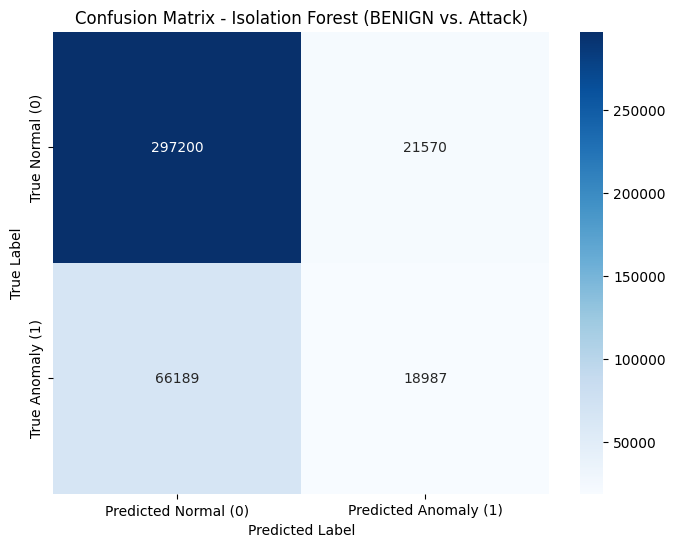

In [50]:
# Confusion Matrix for Isolation Forest (BENIGN vs. Attack)
cm_iso = confusion_matrix(y_test_binary_iso, y_pred_if)
plt.figure(figsize=(8, 6)) # Adjust size for binary confusion matrix
sns.heatmap(cm_iso, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Normal (0)', 'Predicted Anomaly (1)'],
            yticklabels=['True Normal (0)', 'True Anomaly (1)'])
plt.title('Confusion Matrix - Isolation Forest (BENIGN vs. Attack)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

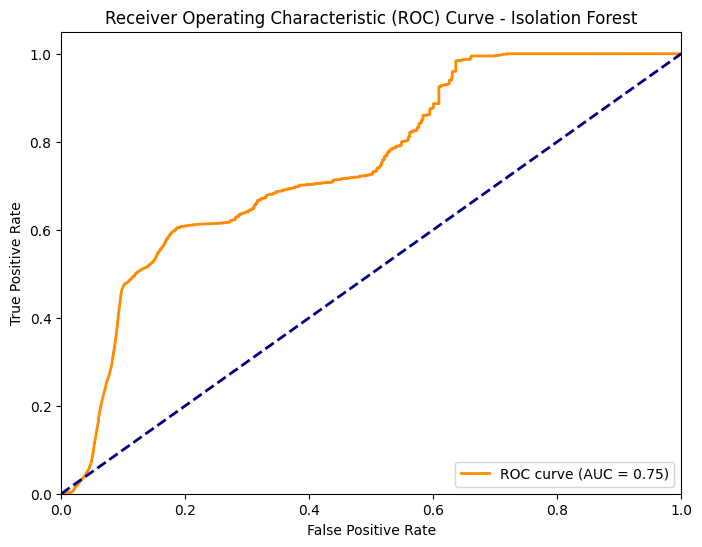


AUC for Isolation Forest (Anomaly Detection): 0.747


In [51]:
y_scores_if = -iso_forest.decision_function(X_test)

# Binarize the true labels: Anomaly (non-BENIGN) = 1, Normal (BENIGN) = 0
# Ensure y_test_binary is created consistently
y_test_binary_iso = y_test.apply(lambda x: 0 if x == 'BENIGN' else 1)


# Calculate the ROC curve
fpr_if, tpr_if, thresholds_if = roc_curve(y_test_binary_iso, y_scores_if)

# Calculate the Area Under the Curve (AUC)
roc_auc_if = auc(fpr_if, tpr_if)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_if, tpr_if, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_if:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Isolation Forest')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC for Isolation Forest (Anomaly Detection): {roc_auc_if:.3f}")

In [52]:
# Model 3: Autoencoder (Using GPU)
input_dim = X_train.shape[1]
autoencoder = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(input_dim, activation='sigmoid')
])

autoencoder.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1750376155.511005      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           5,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 78)                  │           5,070 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,390 (60.12 KB)

 Trainable params: 15,390 (60.12 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Use GPU for training
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.fit(X_train, X_train, epochs=10,
                batch_size=32,
                validation_data=(X_test, X_test), verbose=1)

X_test_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)
threshold = np.percentile(mse, 95)
y_pred_ae = (mse > threshold).astype(int)

# Evaluate Autoencoder Performance
print("\nAutoencoder Performance Metrics:")

# Binarize y_test: 1 for non-BENIGN (anomaly), 0 for BENIGN (normal)
y_test_binary_ae = y_test.apply(lambda x: 0 if x == 'BENIGN' else 1)

# Calculate Metrics
ae_accuracy = accuracy_score(y_test_binary_ae, y_pred_ae)
ae_f1 = f1_score(y_test_binary_ae, y_pred_ae, average='weighted')
ae_precision = precision_score(y_test_binary_ae, y_pred_ae, average='weighted')
ae_recall = recall_score(y_test_binary_ae, y_pred_ae, average='weighted')

print(f"Accuracy: {ae_accuracy:.3f}")
print(f"F1 Score: {ae_f1:.3f}")
print(f"Precision: {ae_precision:.3f}")
print(f"Recall: {ae_recall:.3f}")

Epoch 1/10


I0000 00:00:1750376382.098091     215 service.cc:148] XLA service 0x795bf4002180 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750376382.098662     215 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750376382.418446     215 cuda_dnn.cc:529] Loaded cuDNN version 90300


   75/50494 ━━━━━━━━━━━━━━━━━━━━ 1:43 2ms/step - loss: 0.9041 

I0000 00:00:1750376383.676711     215 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


50494/50494 ━━━━━━━━━━━━━━━━━━━━ 131s 3ms/step - loss: 0.6068 - val_loss: 0.6527
Epoch 2/10
50494/50494 ━━━━━━━━━━━━━━━━━━━━ 125s 2ms/step - loss: 0.6415 - val_loss: 0.6499
Epoch 3/10
50494/50494 ━━━━━━━━━━━━━━━━━━━━ 126s 2ms/step - loss: 0.6443 - val_loss: 0.6495
Epoch 4/10
50494/50494 ━━━━━━━━━━━━━━━━━━━━ 126s 2ms/step - loss: 0.6270 - val_loss: 0.6496
Epoch 5/10
50494/50494 ━━━━━━━━━━━━━━━━━━━━ 125s 2ms/step - loss: 0.6318 - val_loss: 0.6493
Epoch 6/10
50494/50494 ━━━━━━━━━━━━━━━━━━━━ 125s 2ms/step - loss: 0.6424 - val_loss: 0.6493
Epoch 7/10
50494/50494 ━━━━━━━━━━━━━━━━━━━━ 125s 2ms/step - loss: 0.6430 - val_loss: 0.6494
Epoch 8/10
50494/50494 ━━━━━━━━━━━━━━━━━━━━ 126s 2ms/step - loss: 0.6836 - val_loss: 0.6493
Epoch 9/10
50494/50494 ━━━━━━━━━━━━━━━━━━━━ 125s 2ms/step - loss: 0.6720 - val_loss: 0.6493
Epoch 10/10
50494/50494 ━━━━━━━━━━━━━━━━━━━━ 128s 3ms/step - loss: 0.6424 - val_loss: 0.6494
12624/12624 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step

Autoencoder Performance Metrics:
Accuracy: 


Classification Report for Autoencoder:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87    318770
           1       0.34      0.08      0.13     85176

    accuracy                           0.77    403946
   macro avg       0.57      0.52      0.50    403946
weighted avg       0.70      0.77      0.71    403946



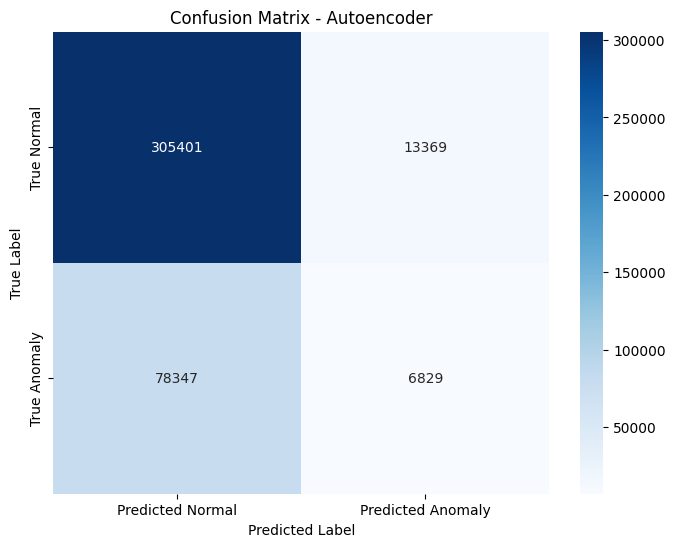

In [54]:
# Classification Report
print("\nClassification Report for Autoencoder:")
print(classification_report(y_test_binary_ae, y_pred_ae, zero_division=1))

# Confusion Matrix
cm_ae = confusion_matrix(y_test_binary_ae, y_pred_ae)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ae, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Normal', 'Predicted Anomaly'],
            yticklabels=['True Normal', 'True Anomaly'])
plt.title('Confusion Matrix - Autoencoder')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

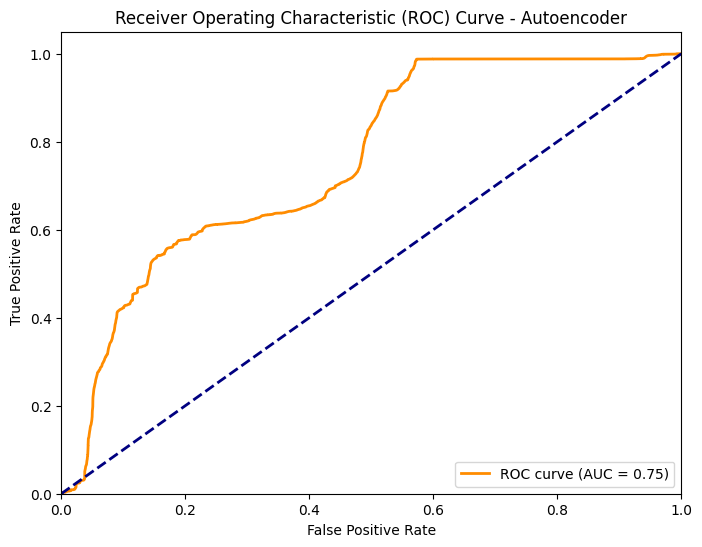


AUC for Autoencoder (Anomaly Detection): 0.755


In [55]:
# ROC Curve for Autoencoder
# The 'score' for the ROC curve is the reconstruction error (MSE)
# Higher MSE means higher likelihood of being an anomaly
y_scores_ae = mse

# Calculate the ROC curve
fpr_ae, tpr_ae, thresholds_ae = roc_curve(y_test_binary_ae, y_scores_ae)

# Calculate the Area Under the Curve (AUC)
roc_auc_ae = auc(fpr_ae, tpr_ae)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ae, tpr_ae, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_ae:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Autoencoder')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC for Autoencoder (Anomaly Detection): {roc_auc_ae:.3f}")

In [59]:
def evaluate_model(y_true, y_pred, model_name):
    # For multi-class classification (like Random Forest on original labels)
    if len(np.unique(y_true)) > 2:
        accuracy = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
        precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
        recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)

    # For binary classification (like Isolation Forest and Autoencoder on binarized labels)
    # Use binary average and ensure y_true is binary
    elif len(np.unique(y_true)) == 2:
        # Ensure y_true contains only 0s and 1s
        if not np.all(np.isin(y_true, [0, 1])):
             raise ValueError("y_true for binary evaluation must contain only 0 and 1.")

        accuracy = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='binary', zero_division=1)
        precision = precision_score(y_true, y_pred, average='binary', zero_division=1)
        recall = recall_score(y_true, y_pred, average='binary', zero_division=1)

    else:
        raise ValueError("y_true must contain at least two unique values.")


    return pd.DataFrame({
        "Model": [model_name],
        "Accuracy": [accuracy],
        "F1 Score": [f1],
        "Precision": [precision],
        "Recall": [recall]
    })

# Evaluate each model using the new function
rf_metrics = evaluate_model(y_test, y_pred_rf, "Random Forest")

# For Isolation Forest, the y_test needs to be binarized (Anomaly vs Normal)
y_test_binary_iso_eval = y_test.apply(lambda x: 0 if x == 'BENIGN' else 1)
# y_pred_if is already binary (1 for anomaly, 0 for normal)
iso_metrics = evaluate_model(y_test_binary_iso_eval, y_pred_if, "Isolation Forest (Anomaly)")

# For Autoencoder, the y_test needs to be binarized (Anomaly vs Normal)
y_test_binary_ae_eval = y_test.apply(lambda x: 0 if x == 'BENIGN' else 1)
# y_pred_ae is already binary (1 for anomaly, 0 for normal)
ae_metrics = evaluate_model(y_test_binary_ae_eval, y_pred_ae, "Autoencoder (Anomaly)")


# Combine the metrics into a single table
performance_summary_table = pd.concat([rf_metrics, iso_metrics, ae_metrics])

# Display the final performance summary table
print("\nModel Performance Summary:")
print(performance_summary_table.round(3))


Model Performance Summary:
                        Model  Accuracy  F1 Score  Precision  Recall
0               Random Forest     0.998     0.998      0.998   0.998
0  Isolation Forest (Anomaly)     0.783     0.302      0.468   0.223
0       Autoencoder (Anomaly)     0.773     0.130      0.338   0.080


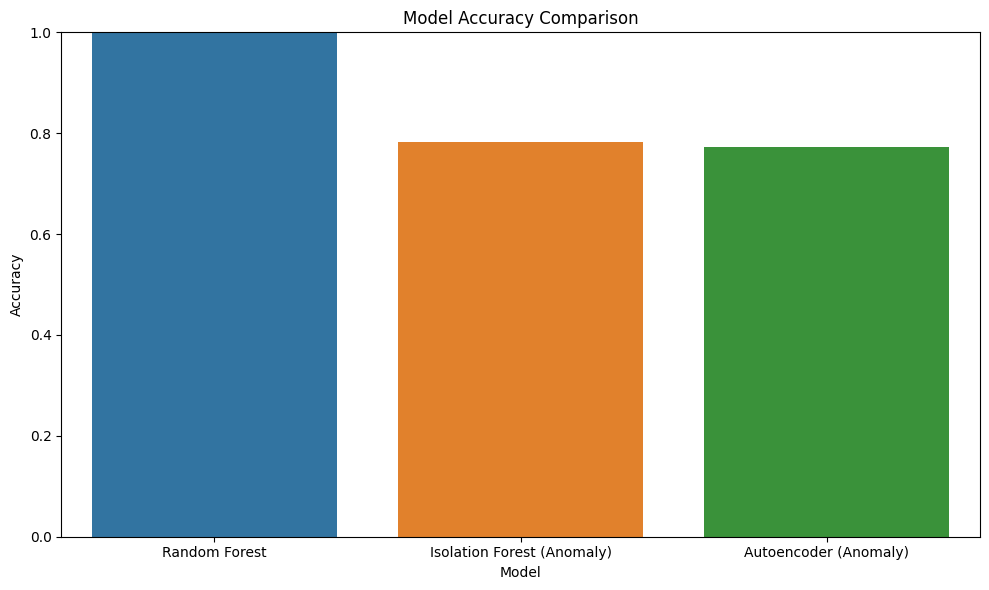

In [62]:
# Define model names and their corresponding accuracy scores
model_names = performance_summary_table['Model']
accuracy_scores = performance_summary_table['Accuracy']

# Create a bar plot of accuracy scores
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_scores)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1]) # Accuracy is between 0 and 1
plt.tight_layout()
plt.show()